In [2]:
import numpy as np
import time
import os
import math
import h5py
from matplotlib import colors as mcolors
from utils import *

%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib notebook

In [4]:
spectra=get_hdf5('scan_banda_completa.hdf5', 'spectra')
d_off=get_hdf5('scan_banda_completa.hdf5', 'd_off')

In [5]:
f=get_hdf5('parametri_scattering.hdf5', 'freqs')

In [6]:
#pump power
p0 = -18.5 #-45
p1 = -17.5 #-15 #best: 19
dp = 0.10 #2
P = np.arange(p0, p1, dp)
N_p = P.size
print(N_p)

#pump frequency
f0 = 17.75 #16.5
f1 = 18.25 #17.5
df = 50e-5
F = np.arange(f0, f1, df)
N_f = F.size
print(N_f)

#bias voltageat SIM
v0 = 0.300
v1 = 0.340
dv = 0.002
V = np.arange(v0, v1, dv)
N_v = V.size
print(N_v)

10
1000
21


In [7]:
real_spectra = spectra - d_off #d_off is the spectral density corresponding to no bias voltage
bw_tensor = np.empty((N_f, N_v, N_p))
gain_tensor = np.empty((N_f, N_v, N_p))
ripple_tensor = np.empty((N_f, N_v, N_p))

for i in range(0, N_v):
    for j in range(0, N_p):
        for k in range(0, N_f):
            bw_tensor[k,i,j], i1, i2 = band_width_info(f, spectra[k,i,j,:])
            gain_tensor[k,i,j] = log_mean(real_spectra[k,i,j,i1:i2])
            ripple_tensor[k,i,j] = log_std(real_spectra[k,i,j,i1:i2])

In [8]:
product_tensor = bw_tensor * gain_tensor 

In [9]:
bw_tensor.shape

(1000, 21, 10)

<IPython.core.display.Javascript object>


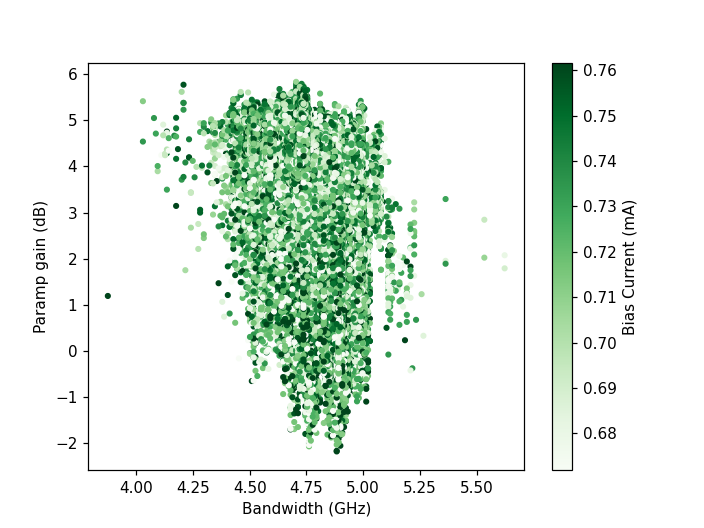

Text(0, 0.5, 'Paramp gain (dB)')

In [25]:
c3D = np.tile(V, (1000,1,10))*2.23974763407
plt.scatter(bw_tensor/1e9, gain_tensor, marker='.', c=c3D, cmap='Greens')
cb=plt.colorbar()
cb.set_label('Bias Current (mA)')


plt.xlabel('Bandwidth (GHz)')
plt.ylabel('Paramp gain (dB)')
#plt.savefig('current_scatter.png')

<IPython.core.display.Javascript object>


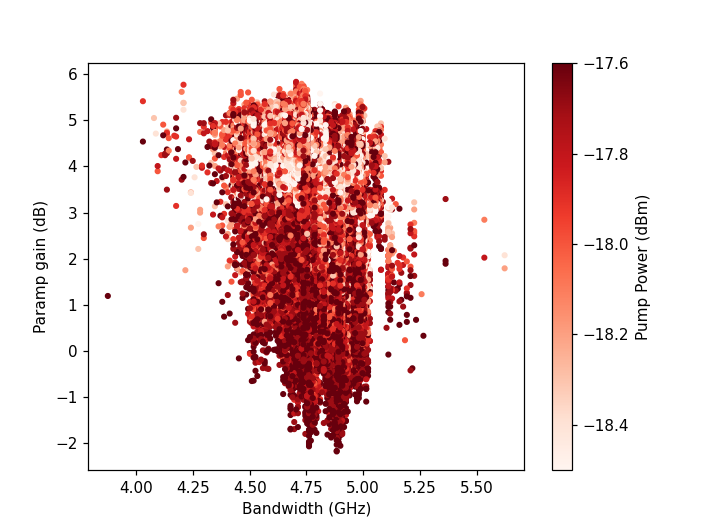

Text(0, 0.5, 'Paramp gain (dB)')

In [26]:
p3D = np.tile(P, (1000,21,1))
plt.scatter(bw_tensor/1e9, gain_tensor, marker='.', c=p3D, cmap='Reds')
cb=plt.colorbar()
cb.set_label('Pump Power (dBm)')

plt.xlabel('Bandwidth (GHz)')
plt.ylabel('Paramp gain (dB)')
#plt.savefig('pumppower_scatter.png')

<IPython.core.display.Javascript object>


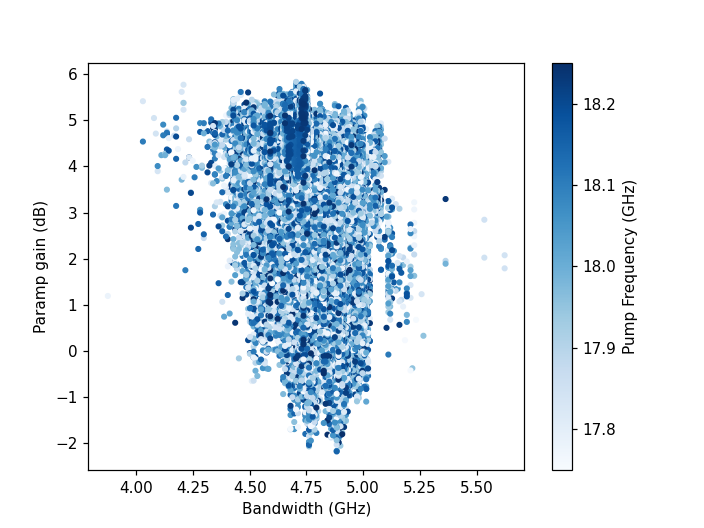

Text(0, 0.5, 'Paramp gain (dB)')

In [27]:
f3D = np.tile(F, (1,21,10))
plt.scatter(bw_tensor/1e9, gain_tensor, marker='.', c=f3D, cmap='Blues')
cb=plt.colorbar()
cb.set_label('Pump Frequency (GHz)')

plt.xlabel('Bandwidth (GHz)')
plt.ylabel('Paramp gain (dB)')
#plt.savefig('pumpfreq_scatter.png')

In [13]:
prod_best = product_tensor.max()
k_best, i_best, j_best = np.where(product_tensor == prod_best)
gain_best = gain_tensor[k_best, i_best, j_best][0]
bw_best = bw_tensor[k_best, i_best, j_best][0]
pump_freq_best = F[k_best][0]
pump_pow_best = P[j_best][0]
volt_best = V[i_best][0]

print(volt_best, pump_freq_best, pump_pow_best)
print(bw_best, gain_best)
print(prod_best)

'''
plt.xlabel('Bandwidth (GHz)')
plt.ylabel('Paramp gain (dB)')


x=np.linspace(bw_tensor.min(), bw_tensor.max(), 10000)
y1=prod_best/x
y5=np.zeros(10000)
y3=y1/2
y4=y1/4
y2=y1*3/4
plt.plot(x/1e9,y1, '#55CF00', x/1e9, y2, '#B9CF00', x/1e9, y3, '#FFDC00', x/1e9, y4, '#FF8000', x/1e9, y5, 'r')
plt.legend(['GBWP = ' + str(prod_best), 'GBWP = ' + str(prod_best*3/4), 'GBWP = ' + str(prod_best/2), 'GBWP = ' + str(prod_best/4), 'GBWP = 0'], prop={'size': 6})
plt.scatter(bw_tensor/1e9, gain_tensor, marker='.')
plt.plot(bw_best/1e9, gain_best, '*r')
#plt.savefig('pumpfreq_scatter.png')
'''

0.338 18.245499999998845 -17.79999999999999
4704375000.0 5.838490781479804
27466450070.12405


"\nplt.xlabel('Bandwidth (GHz)')\nplt.ylabel('Paramp gain (dB)')\n\n\nx=np.linspace(bw_tensor.min(), bw_tensor.max(), 10000)\ny1=prod_best/x\ny5=np.zeros(10000)\ny3=y1/2\ny4=y1/4\ny2=y1*3/4\nplt.plot(x/1e9,y1, '#55CF00', x/1e9, y2, '#B9CF00', x/1e9, y3, '#FFDC00', x/1e9, y4, '#FF8000', x/1e9, y5, 'r')\nplt.legend(['GBWP = ' + str(prod_best), 'GBWP = ' + str(prod_best*3/4), 'GBWP = ' + str(prod_best/2), 'GBWP = ' + str(prod_best/4), 'GBWP = 0'], prop={'size': 6})\nplt.scatter(bw_tensor/1e9, gain_tensor, marker='.')\nplt.plot(bw_best/1e9, gain_best, '*r')\n#plt.savefig('pumpfreq_scatter.png')\n"

<IPython.core.display.Javascript object>


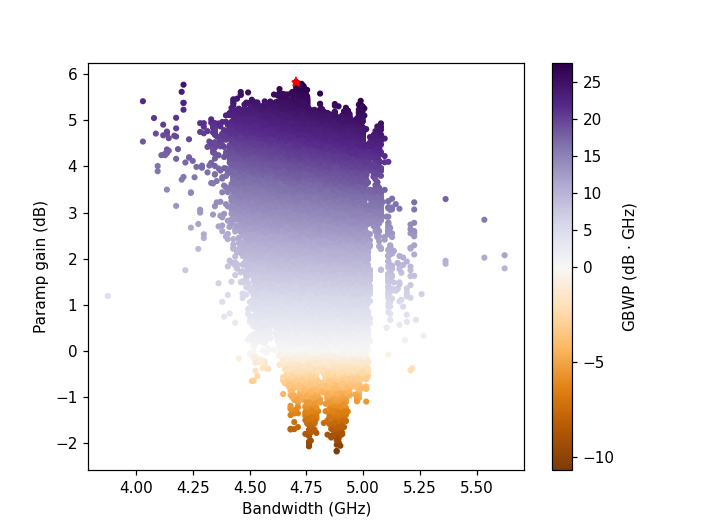

In [28]:
plt.xlabel('Bandwidth (GHz)')
plt.ylabel('Paramp gain (dB)')

normalize=mcolors.TwoSlopeNorm(vcenter=0)

plt.scatter(bw_tensor/1e9, gain_tensor, marker='.', c=product_tensor/1e9, cmap='PuOr', norm=normalize)
plt.plot(bw_best/1e9, gain_best, '*r')
cb=plt.colorbar()
cb.set_label( "GBWP (dB $\cdot$ GHz) ")
#plt.savefig('GBWP_scatter.png')

<IPython.core.display.Javascript object>


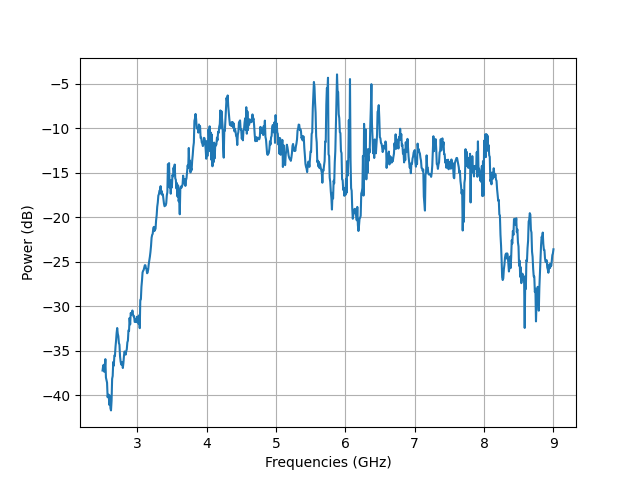

In [15]:
my_plot(f,np.squeeze(spectra[k_best, i_best, j_best, :]))
#plt.savefig('best_spectra.png')

<IPython.core.display.Javascript object>


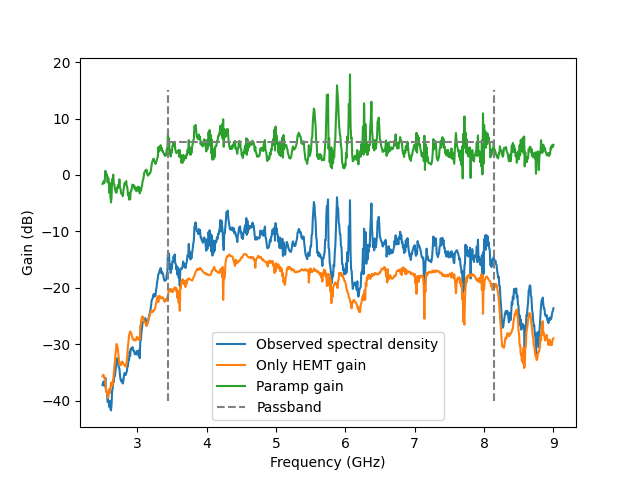

converged at 3th iteration!
4704375000.0
5.838490781479804 5.988755895790341 3.4425


In [16]:
plt.plot(f/1e9, np.squeeze(spectra[k_best, i_best, j_best, :]))
g, bw, start = band_info(f, np.squeeze(spectra[k_best, i_best, j_best, :]))
plt.plot(f/1e9, d_off)
print(bw)

plt.plot(f/1e9, np.squeeze(real_spectra[k_best, i_best, j_best, :]))
b, i1, i2 = band_width_info(f, np.squeeze((spectra[k_best, i_best, j_best,:])))
real_g = log_mean(real_spectra[k_best, i_best, j_best,i1:i2])
n = log_std(real_spectra[k_best, i_best, j_best,i1:i2])

plt.vlines(start/1e9, -40, 15, linestyles ="dashed", colors ="0.5")
plt.vlines((start+bw)/1e9, -40, 15, linestyles ="dashed", colors ="0.5")
plt.hlines(real_g, start/1e9, (start+bw)/1e9, linestyles ="dashed", colors ="0.5")
#plt.hlines(g, start/1e9, (start+bw)/1e9, linestyles ="dashed", colors ="0.5")



plt.legend(['Observed spectral density', 'Only HEMT gain','Paramp gain', 'Passband'], loc='best')

plt.xlabel('Frequency (GHz)')
plt.ylabel('Gain (dB)')

print(real_g, n, f[i1]/1e9)
#plt.savefig('final_results.png')

<IPython.core.display.Javascript object>


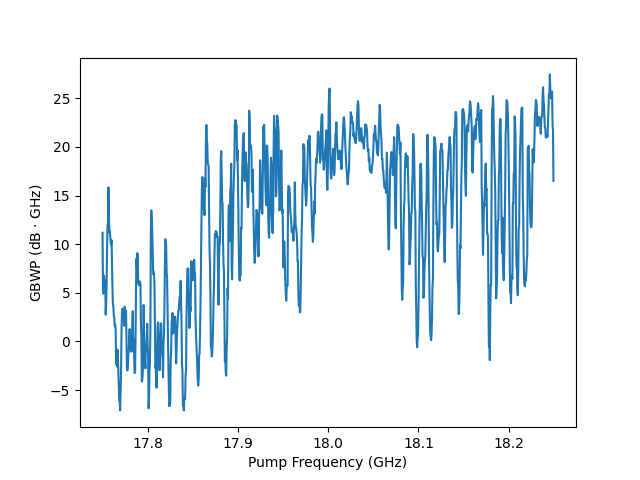

Text(0, 0.5, 'GBWP (dB $\\cdot$ GHz)')

In [17]:
plt.plot(F, product_tensor[:, i_best, j_best]/1e9)
plt.xlabel('Pump Frequency (GHz)')
plt.ylabel('GBWP (dB $\cdot$ GHz)')

#plt.savefig('freqGBWP.png')

<IPython.core.display.Javascript object>


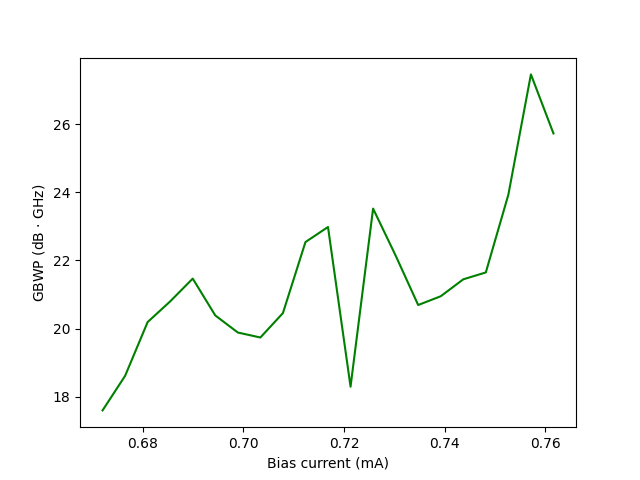

Text(0, 0.5, 'GBWP (dB $\\cdot$ GHz)')

In [18]:
plt.plot(V*2.24, product_tensor[k_best, :, j_best][0]/1e9, '-g')
plt.xlabel('Bias current (mA)')
plt.ylabel('GBWP (dB $\cdot$ GHz)')
#plt.savefig('biasGBWP.png')

<IPython.core.display.Javascript object>


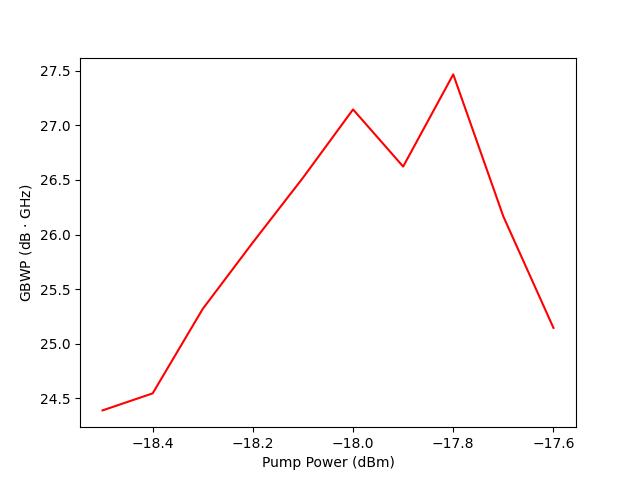

Text(0, 0.5, 'GBWP (dB $\\cdot$ GHz)')

In [19]:
plt.plot(P, product_tensor[k_best, i_best,:][0]/1e9, '-r')
plt.xlabel('Pump Power (dBm)')
plt.ylabel('GBWP (dB $\cdot$ GHz)')
#plt.savefig('powerGBWP.png')

In [20]:
product_tensor.shape #f V P

(1000, 21, 10)

### mappe di colore

In [29]:
inviluppi = np.empty((N_f, N_v, N_p))
for i in range(0, N_v):
    #print(V[j], ' V')
    for j in range(0, N_p):
        #print('\t', P[k], ' dBm')
        low, inviluppi[:,i,j] = envelopes(product_tensor[:,i,j], dmin=20,dmax=20)

print('inviluppi finiti')

inviluppi finiti


<IPython.core.display.Javascript object>


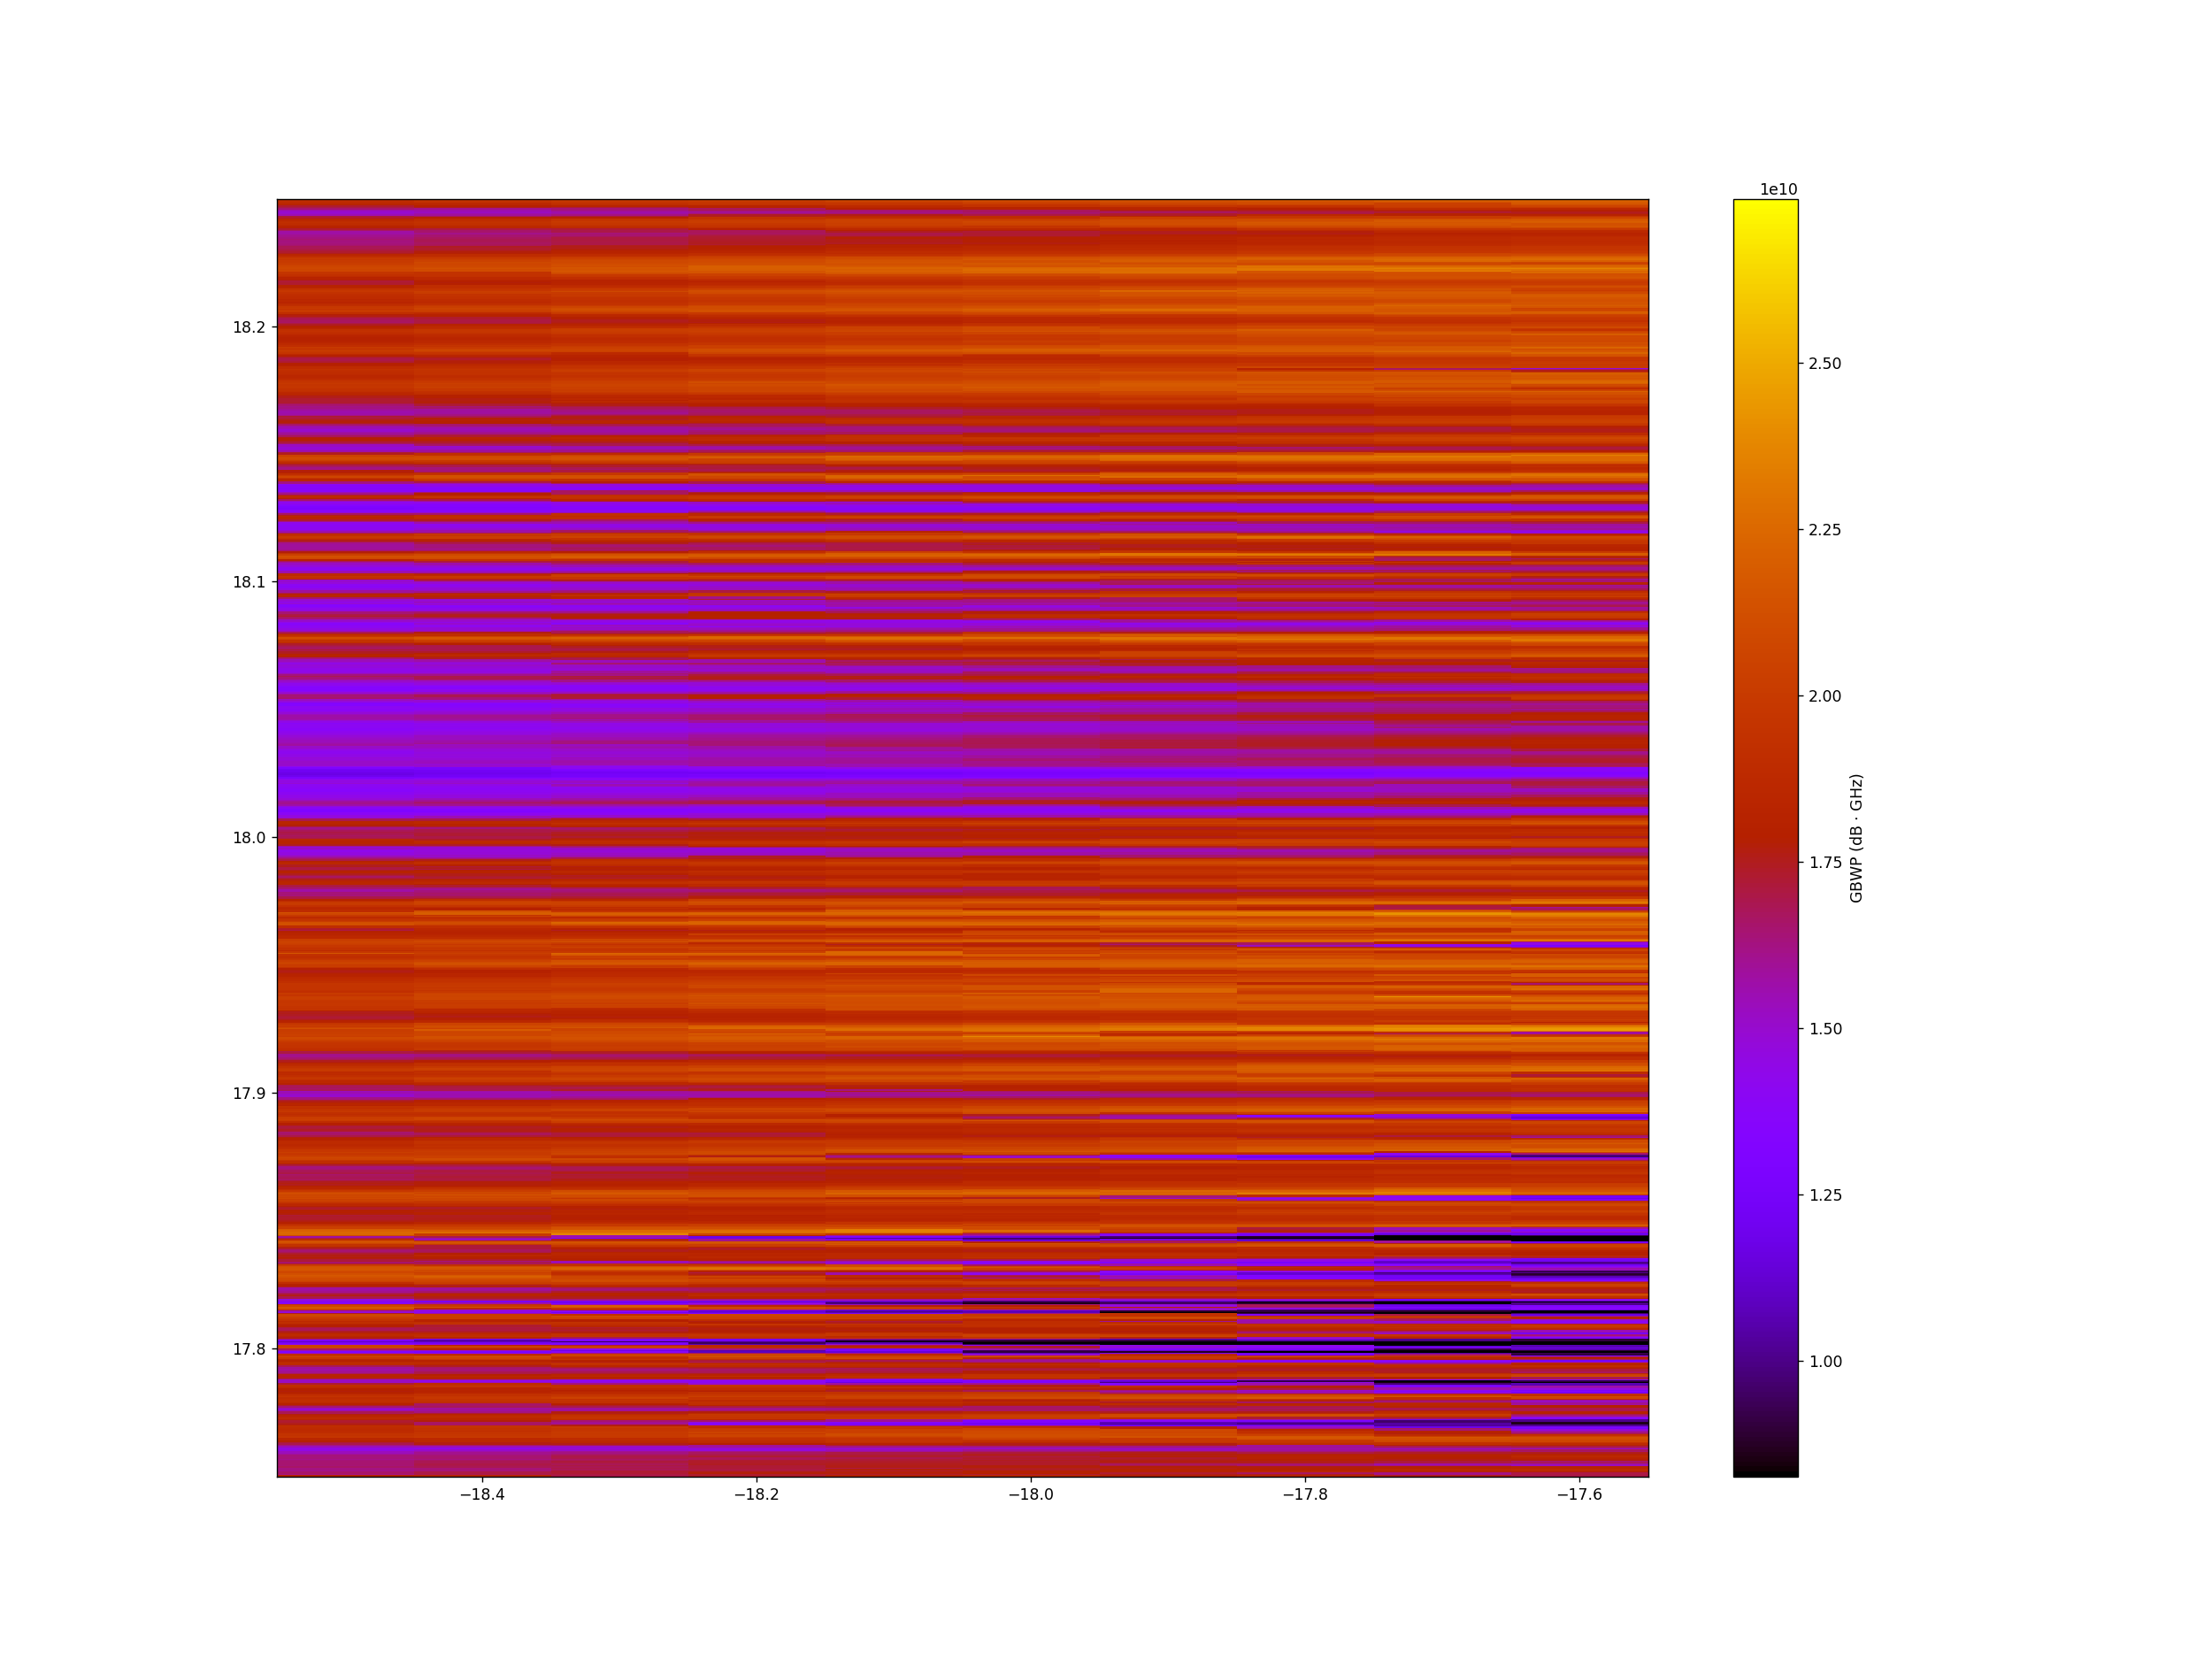

<IPython.core.display.Javascript object>


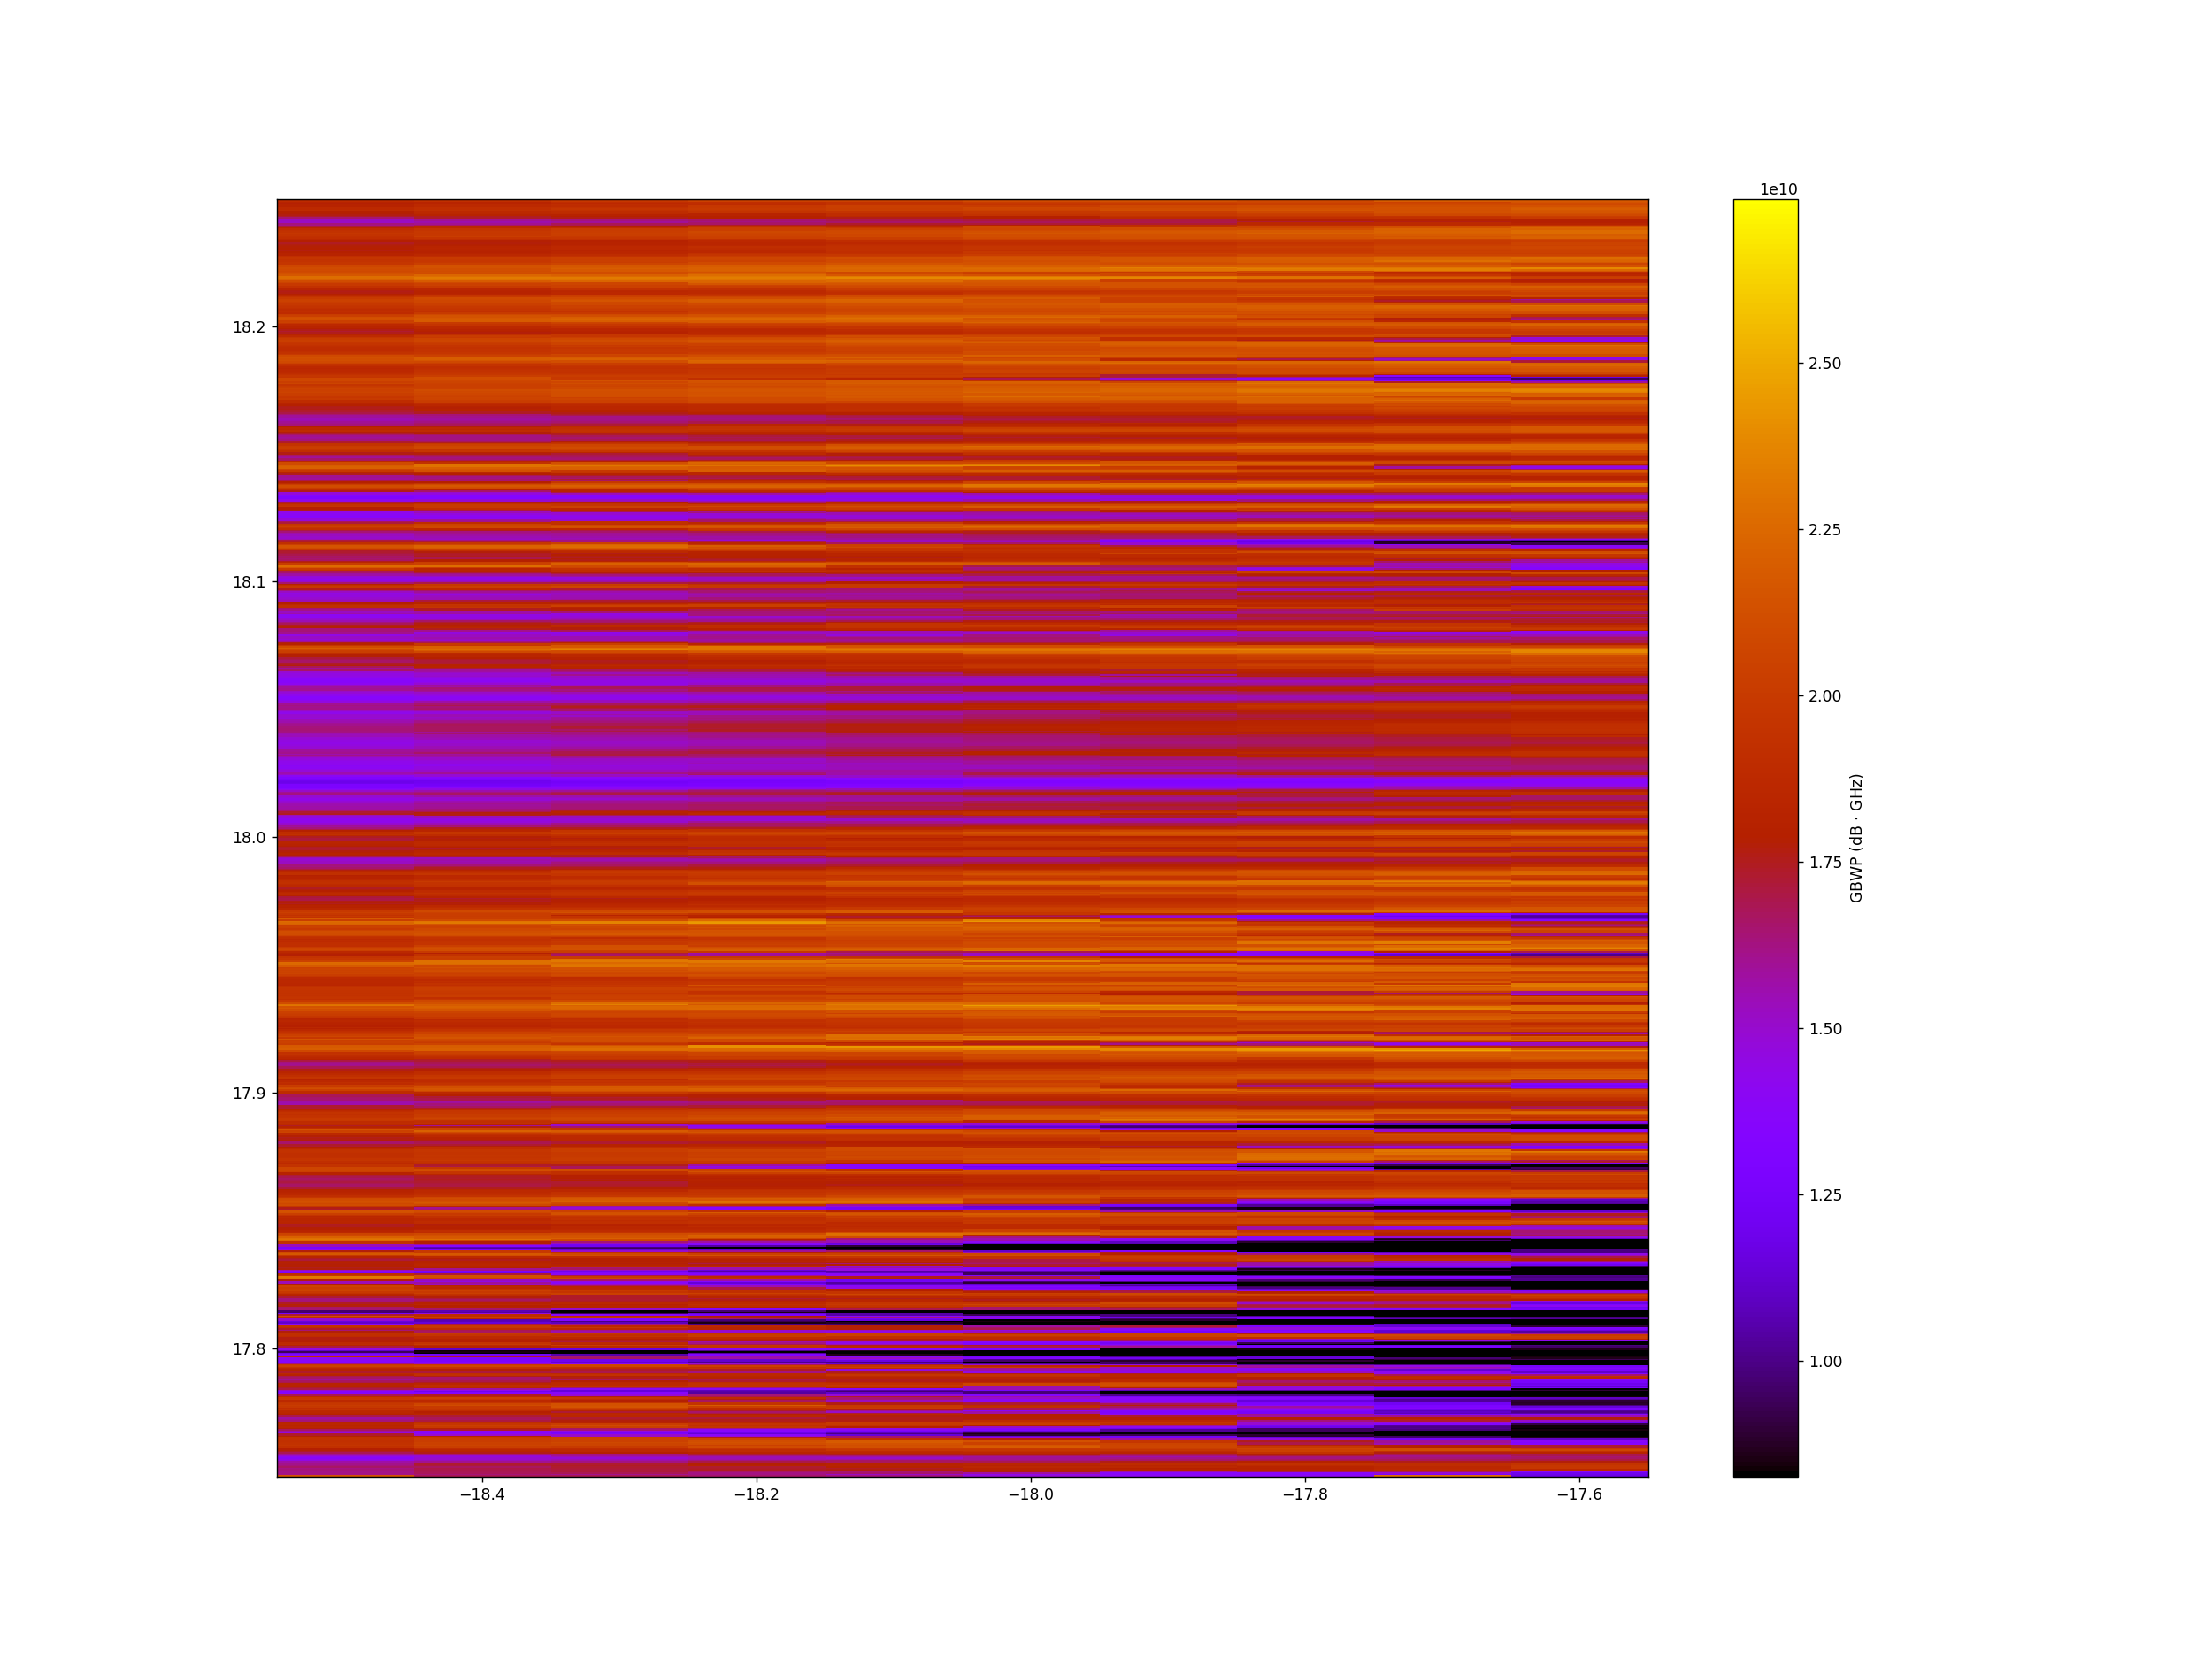

<IPython.core.display.Javascript object>


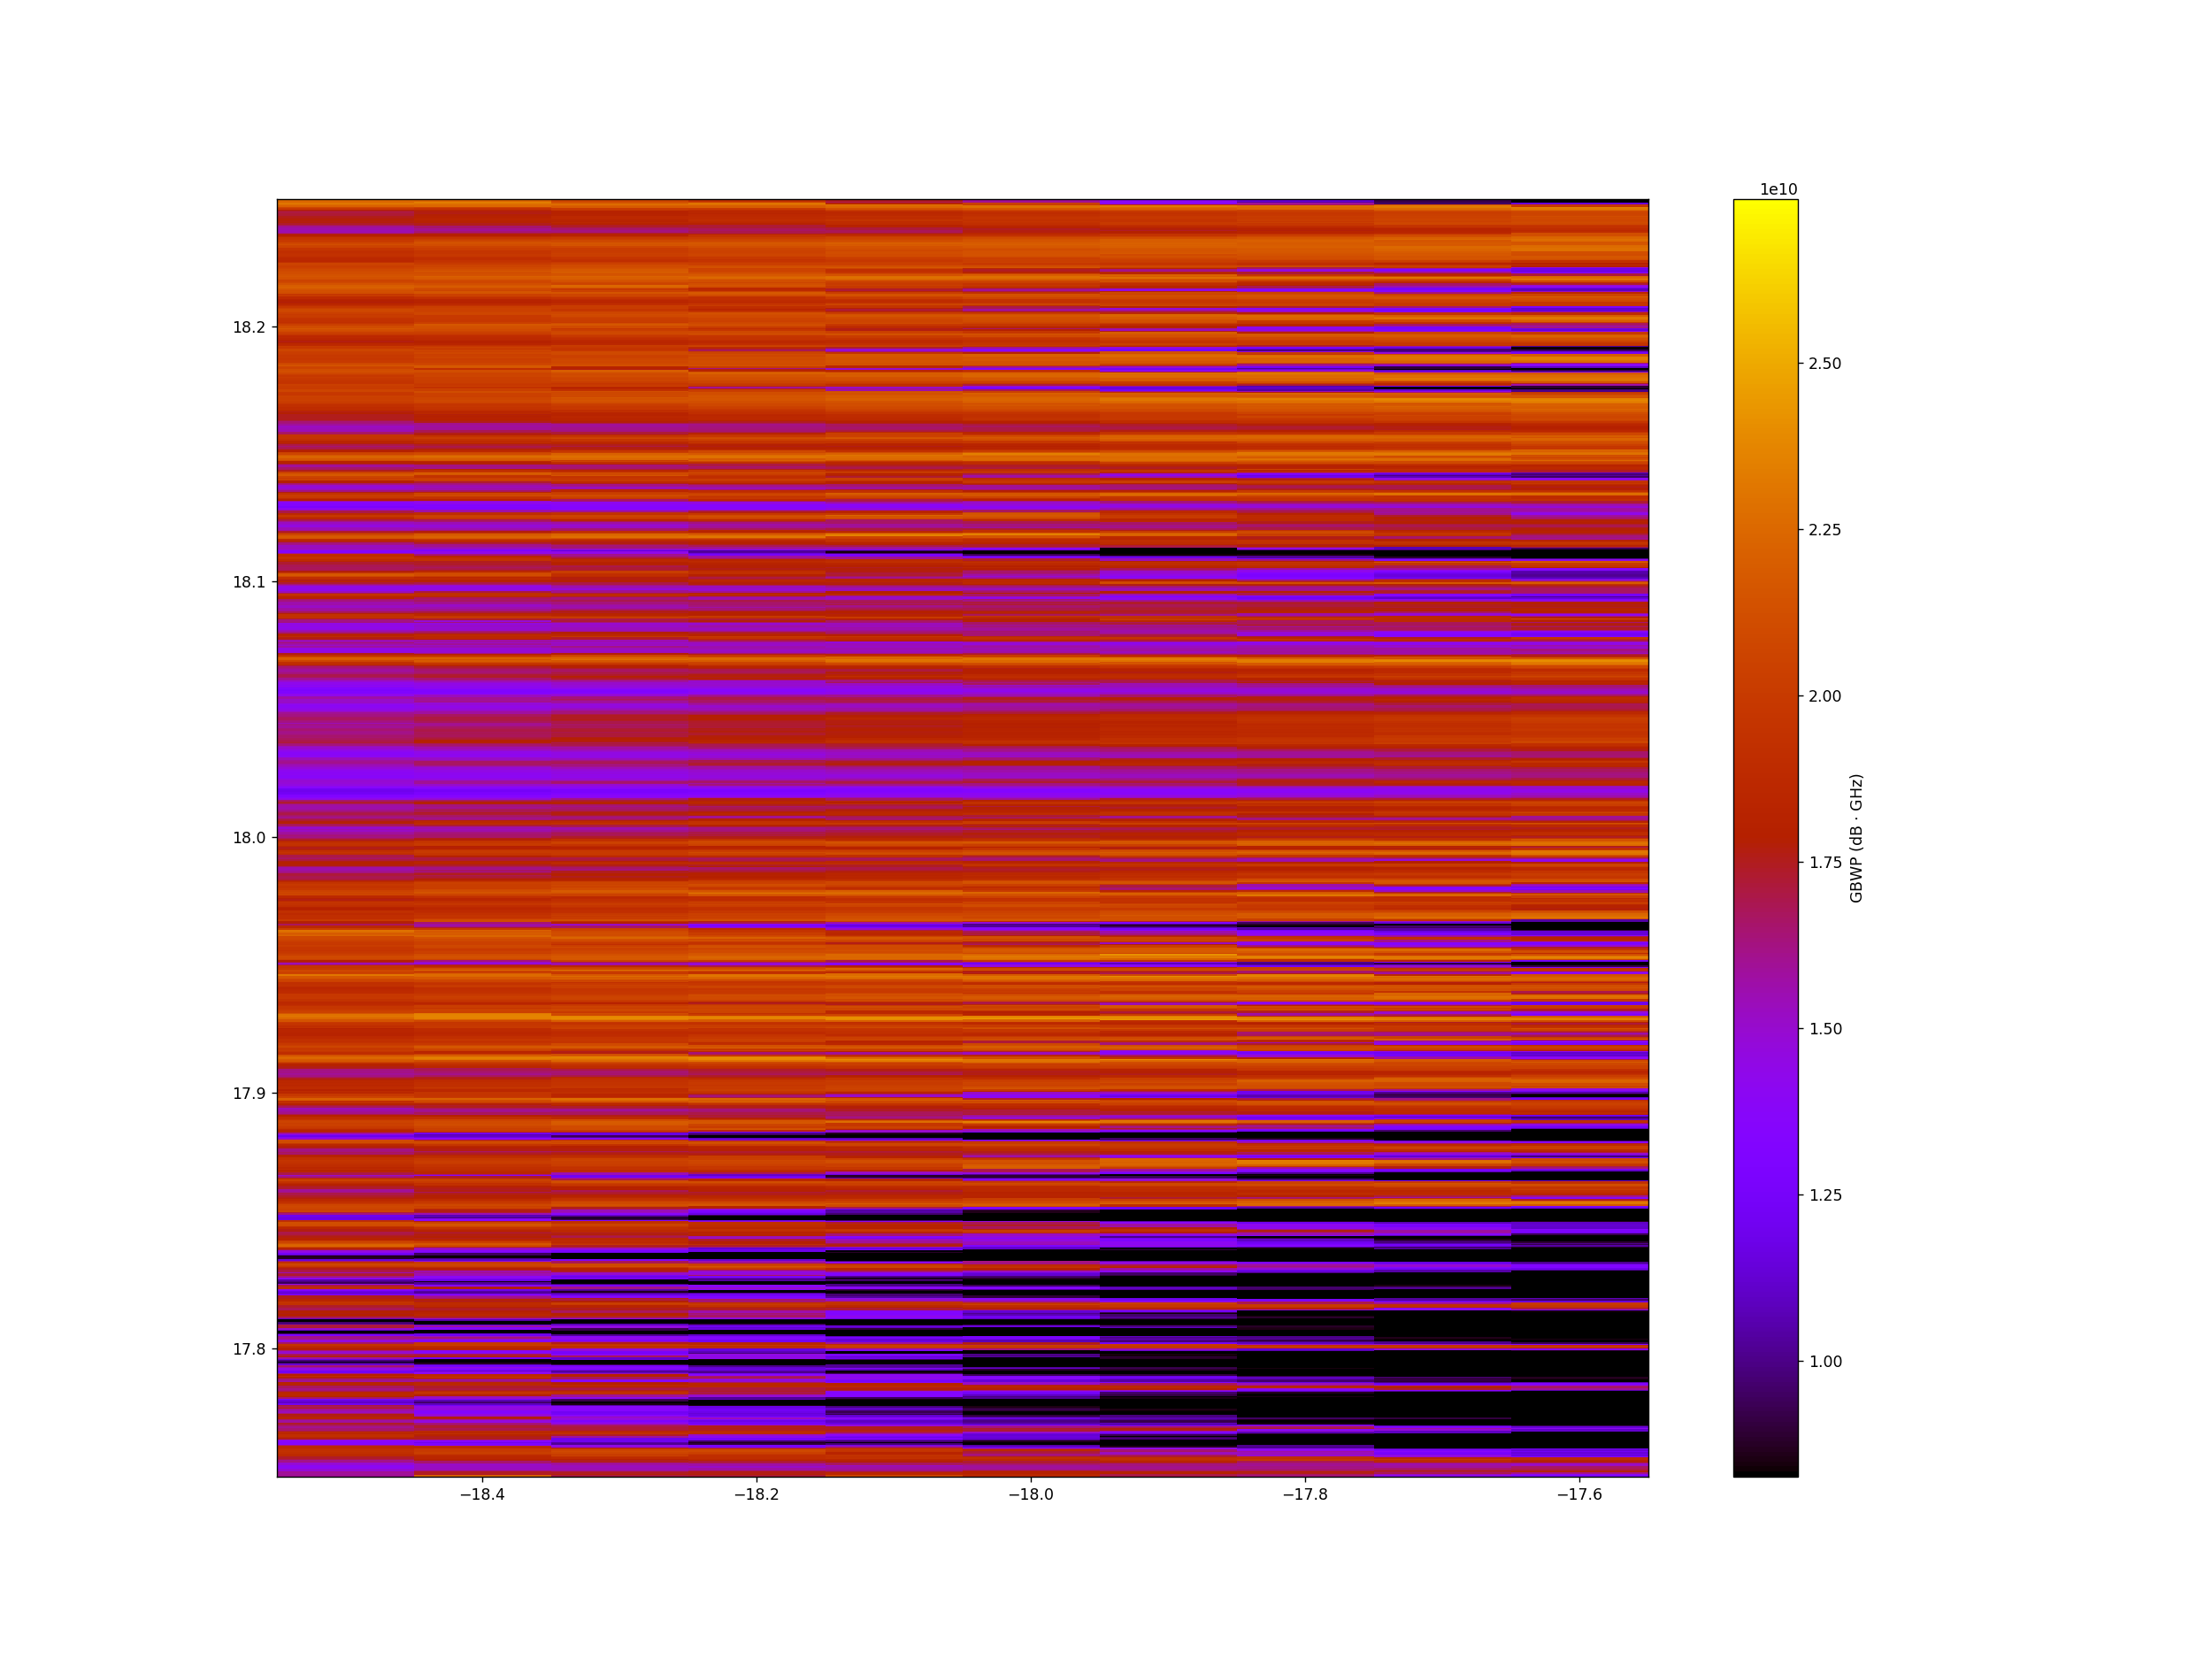

<IPython.core.display.Javascript object>


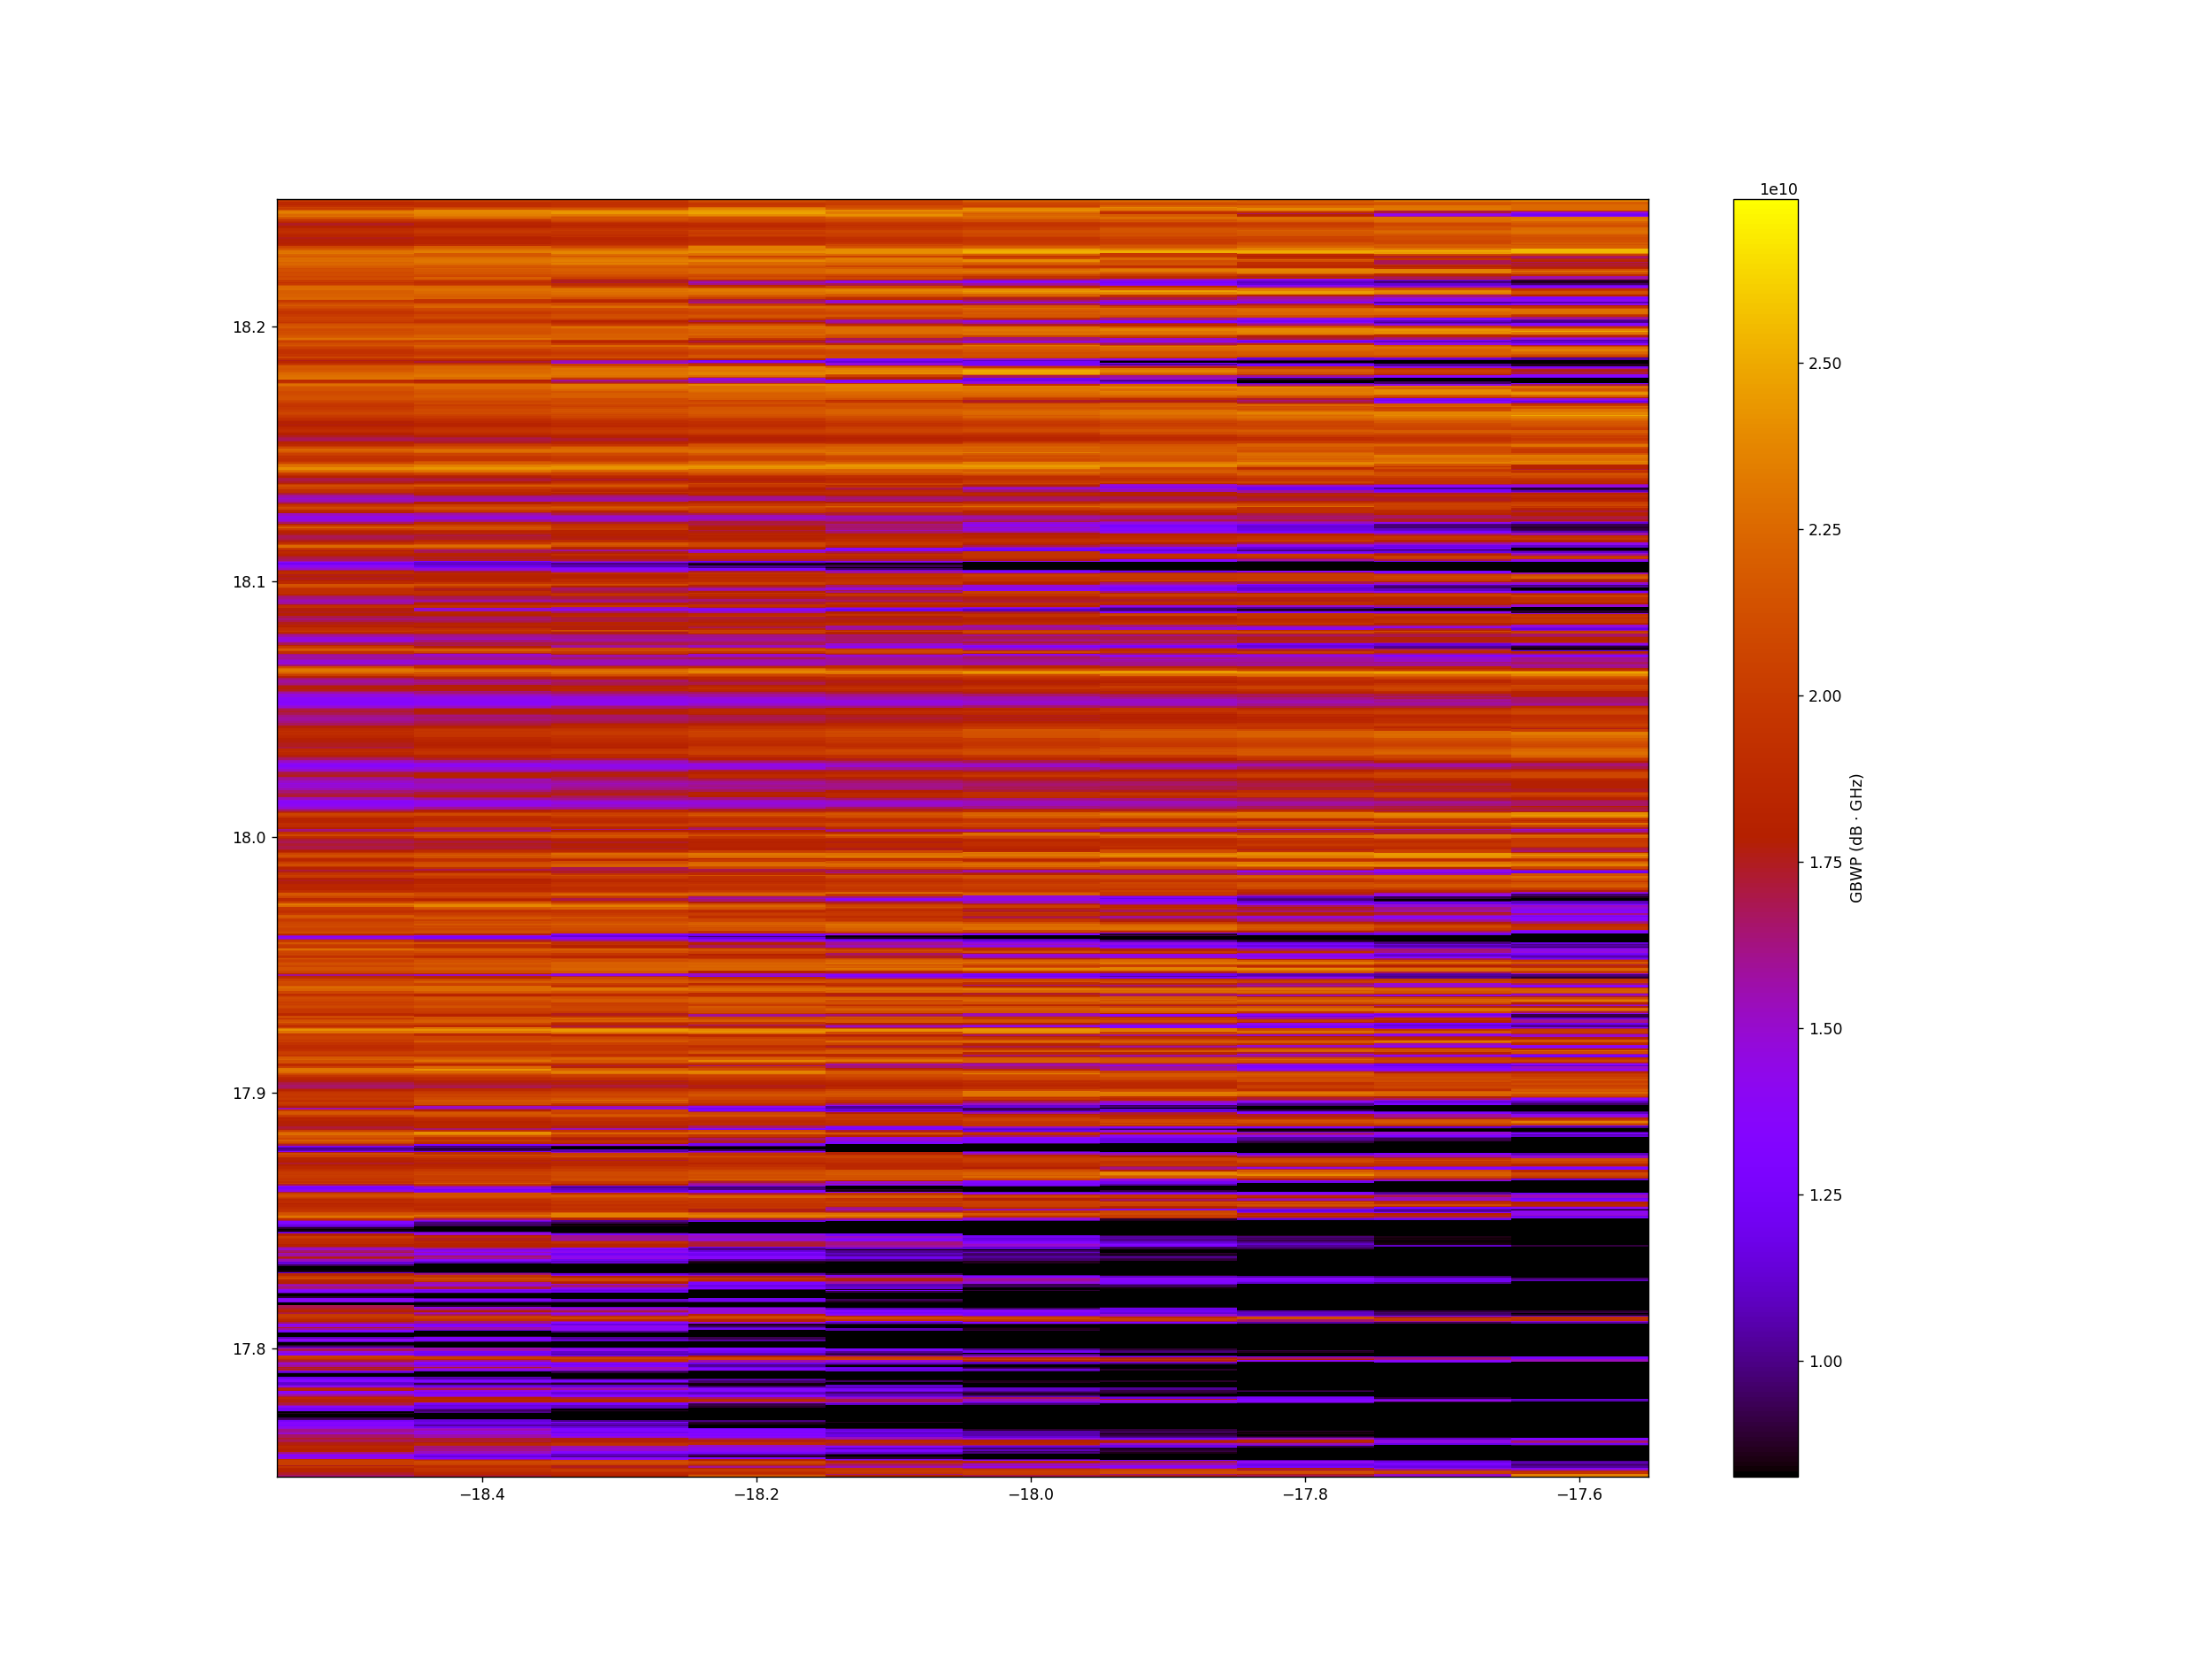

<IPython.core.display.Javascript object>


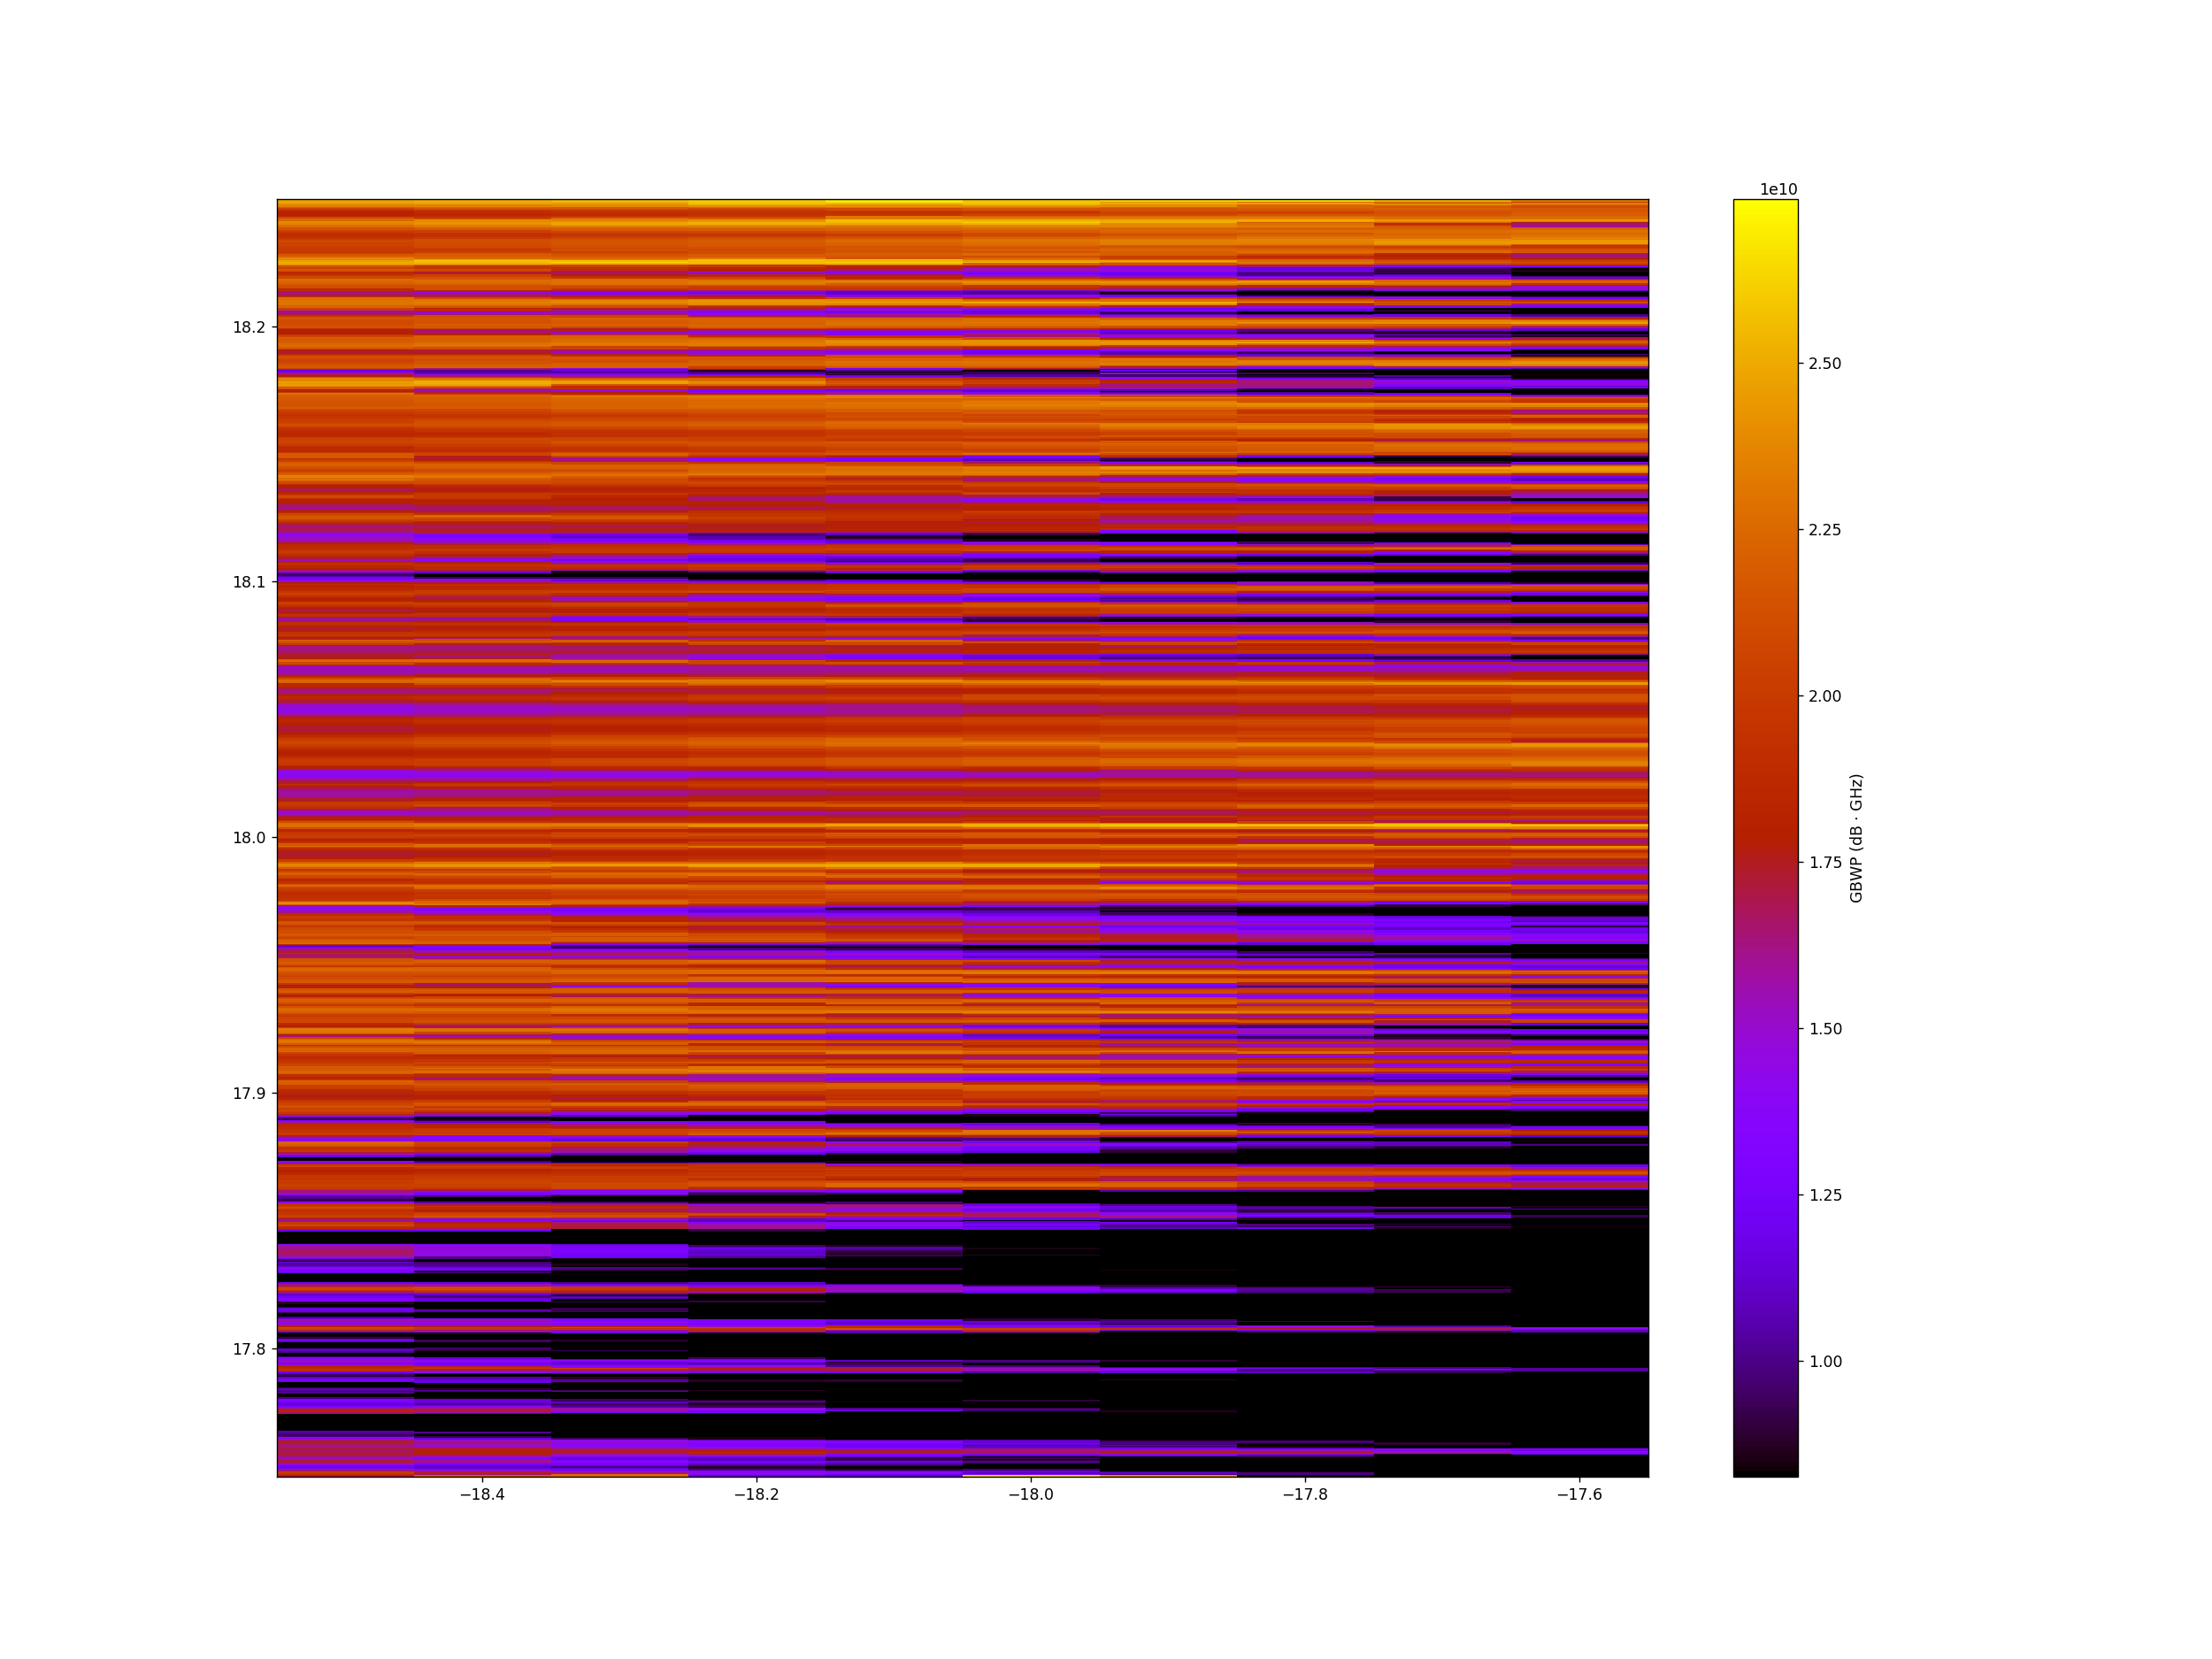

Saved images


In [64]:
for i in range(0,5):
    fig = plt.figure(figsize=(20,15))

    plot = plt.pcolormesh(P, F, product_tensor[:,i*4,:], cmap='gnuplot', shading = 'auto', vmin=inviluppi.min(), vmax=inviluppi.max())
    fig.colorbar(plot, label = 'GBWP (dB $\cdot$ GHz)')
    plt.savefig('bias' + str(V[i*4]*2.24) + '.png')

print('Saved images')

In [33]:
prod2_tensor = bw_tensor * (gain_tensor - ripple_tensor) 

In [37]:
prod_best2 = prod2_tensor.max()
k_best2, i_best2, j_best2 = np.where(prod2_tensor == prod_best2)
gain_best2 = gain_tensor[k_best2, i_best2, j_best2][0]
bw_best2 = bw_tensor[k_best2, i_best2, j_best2][0]
pump_freq_best2 = F[k_best2][0]
pump_pow_best2 = P[j_best2][0]
volt_best2 = V[i_best2][0]

print(volt_best2, pump_freq_best2, pump_pow_best2)
print(bw_best2, gain_best2)
print(prod_best2)


0.302 18.02499999999936 -18.5
4712500000.0 2.5011457652076574
25965874914.326977


<IPython.core.display.Javascript object>


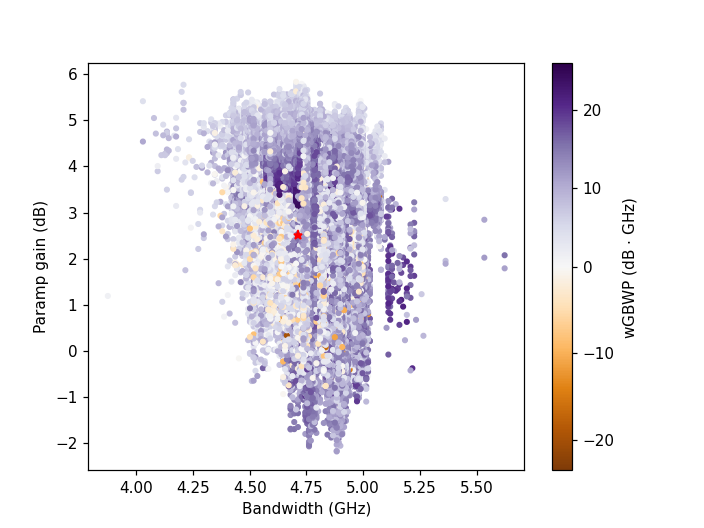

In [46]:
plt.xlabel('Bandwidth (GHz)')
plt.ylabel('Paramp gain (dB)')

normalize=mcolors.TwoSlopeNorm(vcenter=0)

plt.scatter(bw_tensor/1e9, gain_tensor, marker='.', c=prod2_tensor/1e9, cmap='PuOr', norm=normalize)
plt.plot(bw_best2/1e9, gain_best2, '*r')
cb=plt.colorbar()
cb.set_label( "wGBWP (dB $\cdot$ GHz) ")
plt.savefig('weightedGBWP_scatter.png')

In [41]:
acc = np.where(gain_tensor>=3)

prod_best3 = prod2_tensor[acc].max()
k_best3, i_best3, j_best3 = np.where(prod2_tensor == prod_best3)
gain_best3 = gain_tensor[k_best3, i_best3, j_best3][0]
bw_best3 = bw_tensor[k_best3, i_best3, j_best3][0]
pump_freq_best3 = F[k_best3][0]
pump_pow_best3 = P[j_best3][0]
volt_best3 = V[i_best3][0]

print(volt_best3, pump_freq_best3, pump_pow_best3)
print(bw_best3, gain_best3)
print(prod_best3)

acc2 = np.where(gain_tensor>=4)

prod_best4 = prod2_tensor[acc2].max()
k_best4, i_best4, j_best4 = np.where(prod2_tensor == prod_best4)
gain_best4 = gain_tensor[k_best4, i_best4, j_best4][0]
bw_best4 = bw_tensor[k_best4, i_best4, j_best4][0]
pump_freq_best4 = F[k_best4][0]
pump_pow_best4 = P[j_best4][0]
volt_best4 = V[i_best4][0]

print(volt_best4, pump_freq_best4, pump_pow_best4)
print(bw_best4, gain_best4)
print(prod_best4)

0.302 18.24399999999885 -18.5
4728750000.0 3.1302829704432344
24726423563.01452
0.3 18.19649999999896 -18.4
4720625000.0 4.01721729010855
20351980413.245148


<IPython.core.display.Javascript object>


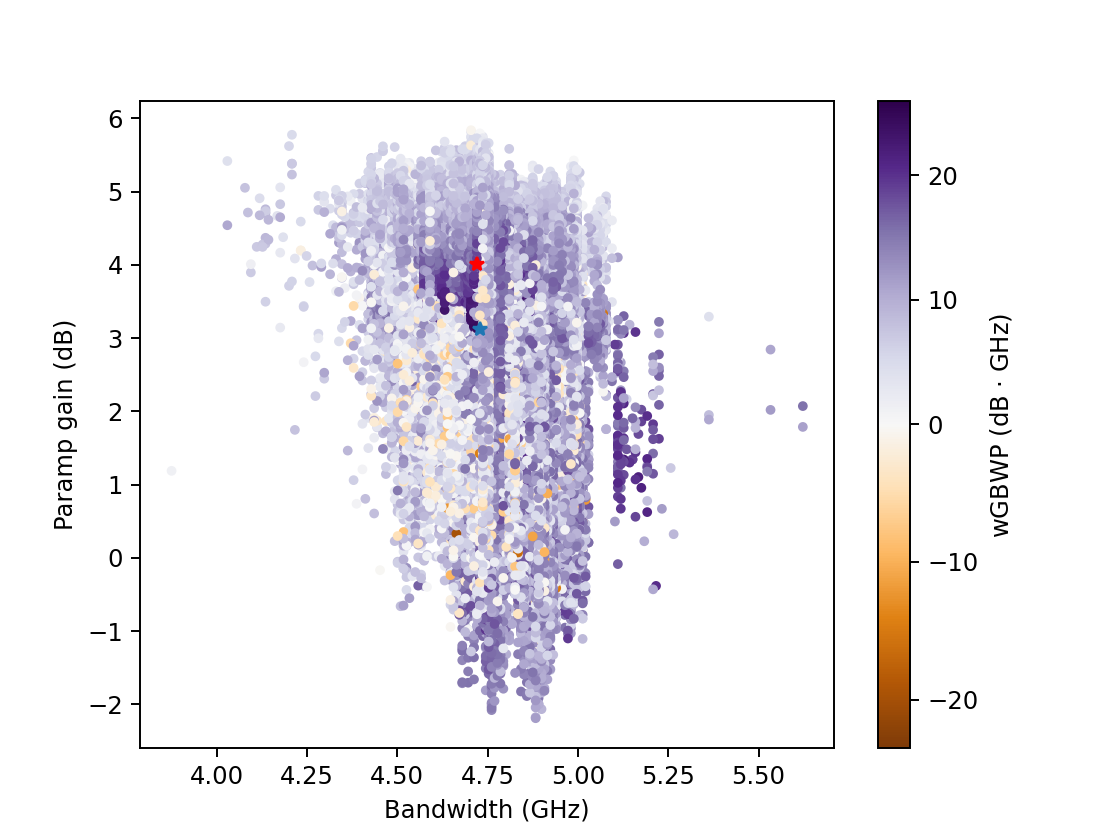

In [57]:
plt.xlabel('Bandwidth (GHz)')
plt.ylabel('Paramp gain (dB)')

normalize=mcolors.TwoSlopeNorm(vcenter=0)

plt.scatter(bw_tensor/1e9, gain_tensor, marker='.', c=prod2_tensor/1e9, cmap='PuOr', norm=normalize)
plt.plot(bw_best3/1e9, gain_best3, '*')
plt.plot(bw_best4/1e9, gain_best4, '*r')
cb=plt.colorbar()
cb.set_label( "wGBWP (dB $\cdot$ GHz) ")
plt.savefig('wGBWPtreshold_scatter.png')

<IPython.core.display.Javascript object>


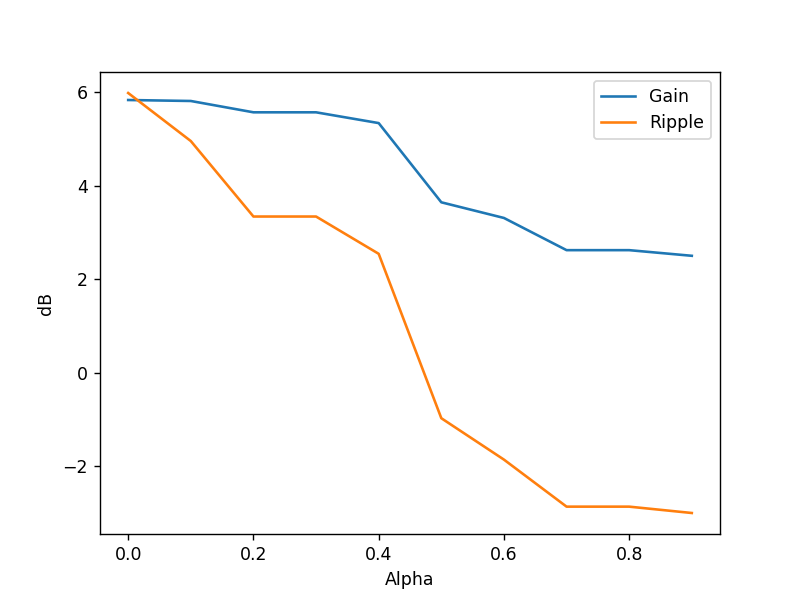

In [83]:
bestgain= np.empty(10)
bestfreq= np.empty(10)
bestcurr= np.empty(10)
bestpow= np.empty(10)
bestrip= np.empty(10)
alpha=np.arange(0,1,0.1)

for n in range(0,10):
    metric_tensor=bw_tensor*(gain_tensor - alpha[n]*ripple_tensor)
    k,i,j = np.where(metric_tensor==metric_tensor.max())
    bestgain[n]=gain_tensor[k,i,j]
    bestfreq[n]= F[k]
    bestcurr[n]= V[i]*2.24
    bestpow[n] = P[j]
    bestrip[n] = ripple_tensor[k,i,j]

plt.plot(alpha, bestgain)
plt.plot(alpha, bestrip)
plt.legend(['Gain', 'Ripple'], loc='best')
plt.xlabel('Alpha')
plt.ylabel('dB')
plt.savefig('gain_ripple_plot.png')

In [74]:
metric_tensor

array([[[ 1.47902493e+10,  1.54026184e+10,  1.77414315e+10, ...,
          1.69416087e+10,  1.46576384e+10,  1.64303950e+10],
        [ 1.62887975e+10,  1.54554413e+10,  1.62856240e+10, ...,
          1.09657621e+10,  1.40460959e+10,  1.34695207e+10],
        [ 1.50165555e+10,  1.88769769e+10,  1.34106052e+10, ...,
          1.62106820e+10,  1.12794159e+10,  1.06796993e+10],
        ...,
        [ 1.33566235e+10,  9.13655544e+09,  9.11376373e+09, ...,
          1.49459160e+10,  5.58381218e+09,  5.97197064e+09],
        [ 3.05241367e+09,  1.50412354e+10,  9.59030381e+09, ...,
          1.17576344e+10,  1.20986999e+10,  1.17409538e+10],
        [-7.76400223e+09,  1.29389899e+10,  7.87079225e+09, ...,
          9.89167061e+09,  1.24062250e+10,  1.11507336e+10]],

       [[ 1.87361669e+10,  1.69835623e+10,  1.79355397e+10, ...,
          1.59719460e+10,  1.56799479e+10,  1.56756555e+10],
        [ 1.55876652e+10,  1.56455957e+10,  1.59059308e+10, ...,
          1.36556819e+10,  1.02161579e

<IPython.core.display.Javascript object>


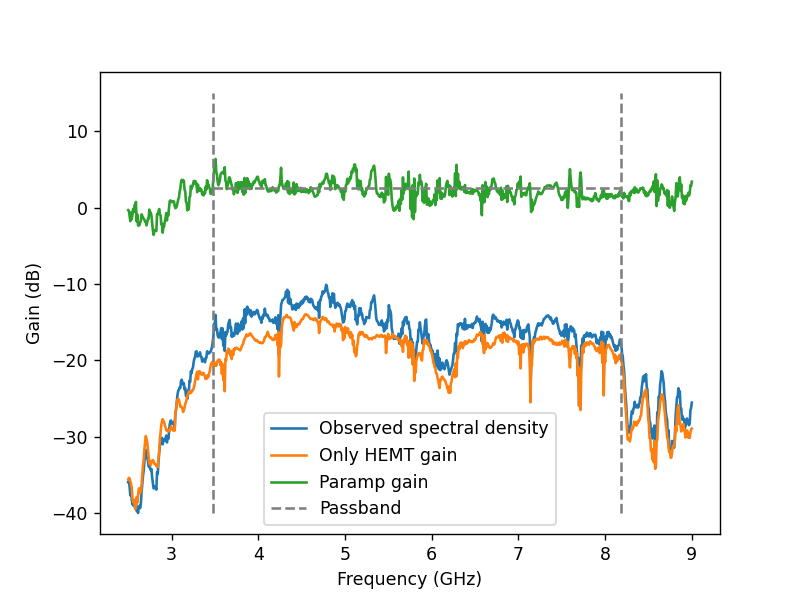

converged at 4th iteration!
4712500000.0
2.5011457652076574 -3.008854216612391 3.475


In [85]:
plt.plot(f/1e9, np.squeeze(spectra[k_best2, i_best2, j_best2, :]))
g, bw, start = band_info(f, np.squeeze(spectra[k_best2, i_best2, j_best2, :]))
plt.plot(f/1e9, d_off)
print(bw)

plt.plot(f/1e9, np.squeeze(real_spectra[k_best2, i_best2, j_best2, :]))
b, i1, i2 = band_width_info(f, np.squeeze((spectra[k_best2, i_best2, j_best2,:])))
real_g = log_mean(real_spectra[k_best2, i_best2, j_best2,i1:i2])
n = log_std(real_spectra[k_best2, i_best2, j_best2,i1:i2])

plt.vlines(start/1e9, -40, 15, linestyles ="dashed", colors ="0.5")
plt.vlines((start+bw)/1e9, -40, 15, linestyles ="dashed", colors ="0.5")
plt.hlines(real_g, start/1e9, (start+bw)/1e9, linestyles ="dashed", colors ="0.5")
#plt.hlines(g, start/1e9, (start+bw)/1e9, linestyles ="dashed", colors ="0.5")



plt.legend(['Observed spectral density','Only HEMT gain','Paramp gain', 'Passband'], loc='best')

plt.xlabel('Frequency (GHz)')
plt.ylabel('Gain (dB)')

print(real_g, n, f[i1]/1e9)
plt.savefig('final_results2.png')